<a href="https://colab.research.google.com/github/vomicienta/DataScience/blob/main/ProyectoDS_Partell_Cignola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Investigación de Exoplanetas - Telescopio Espacial Kepler
Kepler es un observatorio que buscaba planetas extrasolares, de tamaño similar a la Tierra que se encuentran en la zona de habitabilidad de su estrella (Exoplanetas Habitables), llevando a cabo lo que se conoce como **misión Kepler**. Lanzado por la NASA el 6 de marzo de 2009. El 15 de agosto de 2013 se dio por finalizada la misión principal y en noviembre de 2013 el inicio de la misión extendida K2. El 30 de octubre de 2018, tras nueve años de operación, la NASA anunció su retiro.

El nombre es una dedicatoria al astrónomo y matemático Johannes Kepler (1571-1630), descubridor de las tres leyes que describen las características de las órbitas planetarias.

De Wikipedia

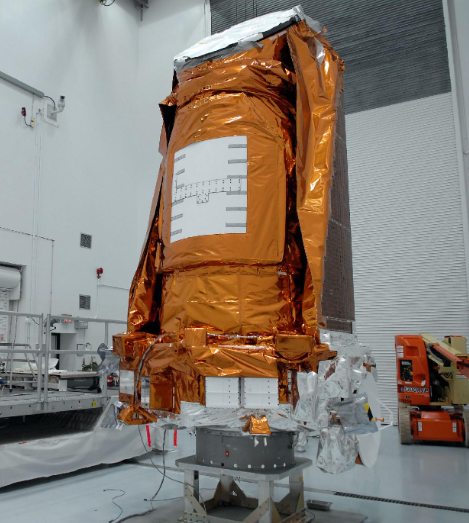

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn

In [31]:
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [32]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/vomicienta/DataScience/main/exoplanets.csv'

In [33]:
exop = pd.read_csv('https://raw.githubusercontent.com/vomicienta/DataScience/main/exoplanets.csv', sep =",")
exop.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [34]:
# renombramos las columnas para que coincidan con la db recolectada por API y publicada la Universidad Tecnológica de California:
# https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html
exop = exop.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpperUnc_days',
'koi_period_err2':'OrbitalPeriodLowerUnc_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc_BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc_BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDurationUpperUnc_hrs',
'koi_duration_err2':'TransitDurationLowerUnc_hrs',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepthUpperUnc_ppm',
'koi_depth_err2':'TransitDepthLowerUnc_ppm',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc_Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc_Earthradii',
'koi_teq':'EquilibriumTemperatureK',
'koi_teq_err1':'EquilibriumTemperatureUpperUncK',
'koi_teq_err2':'EquilibriumTemperatureLowerUncK',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc_Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc_Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperatureK',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUncK',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUncK',
'koi_slogg':'StellarSurfaceGravity_log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc_Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc_Solarradii',
'ra':'RA_decimaldegrees',
'dec':'Dec_decimaldegrees',
'koi_kepmag':'Kepler-band_mag'
})
exop.head().T

,0,1,2,3,4
KepID,10797460,10797460,10811496,10848459,10854555
KOIName,K00752.01,K00752.02,K00753.01,K00754.01,K00755.01
KeplerName,Kepler-227 b,Kepler-227 c,NaN,NaN,Kepler-664 b
ExoplanetArchiveDisposition,CONFIRMED,CONFIRMED,CANDIDATE,FALSE POSITIVE,CONFIRMED
DispositionUsingKeplerData,CANDIDATE,CANDIDATE,CANDIDATE,FALSE POSITIVE,CANDIDATE
DispositionScore,1.0,0.969,0.0,0.0,1.0
NotTransit-LikeFalsePositiveFlag,0,0,0,0,0
koi_fpflag_ss,0,0,0,1,0
CentroidOffsetFalsePositiveFlag,0,0,0,0,0
EphemerisMatchIndicatesContaminationFalsePositiveFlag,0,0,0,0,0


In [35]:
exop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2359 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

In [36]:
exop.describe()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [37]:
#  a continuación analizaremos cuantas columnas están completamente vacías, se utilizará la fn Drop para eliminar
#  las que tengan mayor cantidad de vacíos o las que no sean necesarias para el análisis.
exop.isnull().sum()

KepID                                                       0
KOIName                                                     0
KeplerName                                               7205
ExoplanetArchiveDisposition                                 0
DispositionUsingKeplerData                                  0
DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                454
OrbitalPeriodLowerUnc_days                                454
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                 454
TransitEpochLowerUnc_BKJD                                 454
ImpactPa

In [38]:
exop.drop(columns=['KeplerName','EquilibriumTemperatureUpperUncK', 'EquilibriumTemperatureLowerUncK',
                 'StellarEffectiveTemperatureUpperUncK', 'StellarEffectiveTemperatureLowerUncK', 'TransitDepthUpperUnc_ppm', 'TransitDepthLowerUnc_ppm',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver', 'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
                 'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
                 'KepID'], inplace=True)

In [39]:
exop.dropna(inplace=True)
exop.shape

(7818, 37)

In [40]:
# Columnas con datos categóricos para analisis gráfico:

exop['ExoplanetArchiveDisposition'] = exop['ExoplanetArchiveDisposition'].astype('category')
exop['DispositionUsingKeplerData'] = exop['DispositionUsingKeplerData'].astype('category')
exop['NotTransit-LikeFalsePositiveFlag'] = exop['NotTransit-LikeFalsePositiveFlag'].astype('category')
exop['koi_fpflag_ss'] = exop['koi_fpflag_ss'].astype('category')
exop['CentroidOffsetFalsePositiveFlag'] = exop['CentroidOffsetFalsePositiveFlag'].astype('category')
exop.describe(include='category')

,ExoplanetArchiveDisposition,DispositionUsingKeplerData,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag
count,7818,7818,7818,7818,7818
unique,3,2,3,2,2
top,FALSE POSITIVE,CANDIDATE,0,0,0
freq,3737,4075,7040,5744,6116


In [41]:
exop.DispositionUsingKeplerData.value_counts()

DispositionUsingKeplerData
CANDIDATE         4075
FALSE POSITIVE    3743
Name: count, dtype: int64

In [42]:
exop.ExoplanetArchiveDisposition.value_counts()

ExoplanetArchiveDisposition
FALSE POSITIVE    3737
CONFIRMED         2345
CANDIDATE         1736
Name: count, dtype: int64

In [77]:
# Filtrar las filas con "ExoplanetArchiveDisposition" igual a "CONFIRMED"
confirmed_exoplanets = exop[exop['ExoplanetArchiveDisposition'] == 'CONFIRMED']

# Seleccionar la columna "EquilibriumTemperatureK"
temperaturas_confirmadas = confirmed_exoplanets['EquilibriumTemperatureK']

# Imprimir las temperaturas
print(temperaturas_confirmadas)

0        793.0
1        443.0
4       1406.0
5        835.0
6       1160.0
         ...  
7612     678.0
7658     407.0
8817     365.0
9014     220.0
9083    1081.0
Name: EquilibriumTemperatureK, Length: 2345, dtype: float64


# **Posibles Hipótesis:**


1.   **Disposición y Parámetros Estelares**: Demostrar si existe una relación entre la disposición de KOIs (ExoplanetArchiveDisposition, DispositionUsingKeplerData) y los parámetros estelares (StellarEffectiveTemperatureK, StellarSurfaceGravity, StellarRadius_Solarradii). Por ejemplo: analizar si los exoplanetas confirmados tienen los mismos marcadores que estrellas con temperaturas, superficies o radios similares.
2.   **Transit Flags y Disposición**: Analizar si los indicadores de posición (NotTransit-LikeFalsePositiveFlag, koi_fpflag_ss,CentroidOffsetFalsePositiveFlag, EphemerisMatchIndicatesContaminationFalsePositiveFlag) que demuestran un tránsito orbital pueden predecir la ubicación de un KOI, o mas bién predecir cuales pueden ser Falsos Positivos. En éste punto se analizarían los eventos de física orbital.
3.   **Radio Planetario y Temperatura de Equilibrio**: analizar si existe una correlación entre el Radio Planetario (PlanetaryRadius_Earthradii) y la Temperatura de Equilibrio (EquilibriumTemperatureK), y así determinar la variación entre Equilibrio de Temperatura dependiendo del tamaño del exoplaneta.
4.   **Duración de Tránsito y Período Orbital**: Analizar si la duración de tránsito orbital (TransitDuration_hrs) está directamente relacionada con el período orbital (OrbitalPeriod_days), y si los planetas con períodos orbitales mas largos tienen duraciones de tránsito mas largas o mas cortas.

<Axes: xlabel='StellarEffectiveTemperatureK', ylabel='StellarSurfaceGravity_log10(cm/s**2)'>

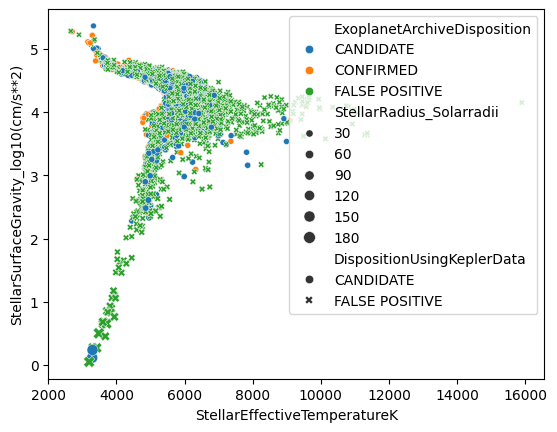

In [43]:
# Disposición y Parámetros Estelares:
sns.scatterplot(
    data=exop,
    x="StellarEffectiveTemperatureK",
    y="StellarSurfaceGravity_log10(cm/s**2)",
    hue="ExoplanetArchiveDisposition",
    style="DispositionUsingKeplerData",
    size="StellarRadius_Solarradii",
)

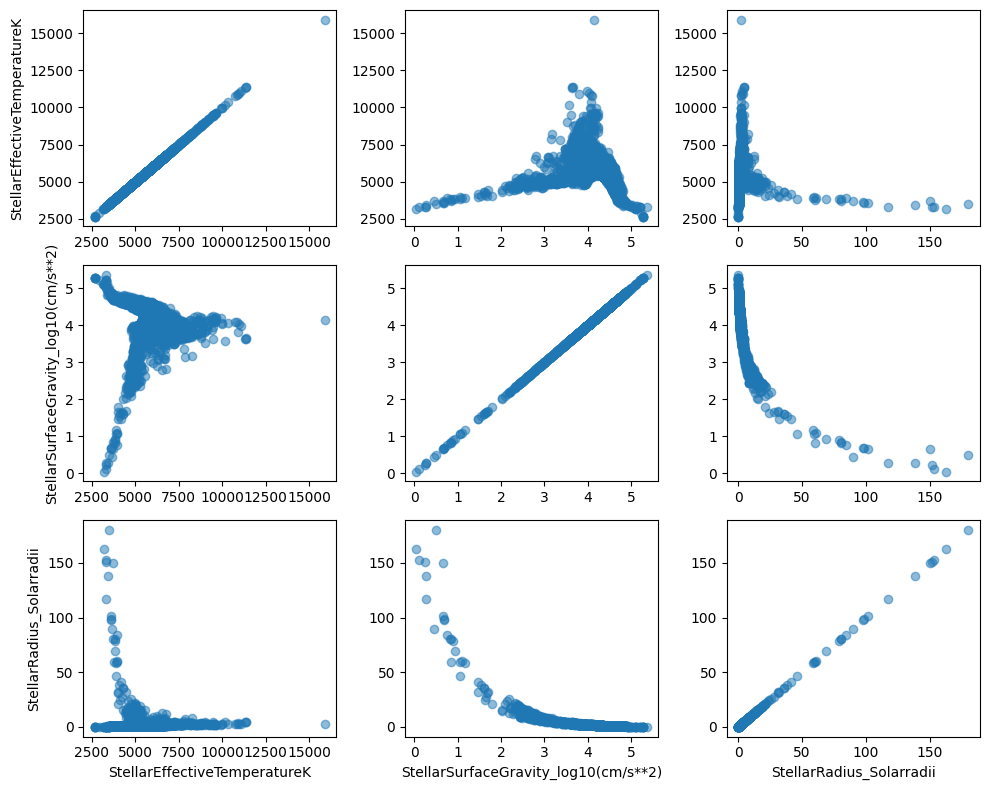

In [44]:
vars = ['StellarEffectiveTemperatureK', 'StellarSurfaceGravity_log10(cm/s**2)', 'StellarRadius_Solarradii']
fig, axs = plt.subplots(len(vars), len(vars), figsize=(10, 8))
for i in range(len(vars)):
    for j in range(len(vars)):
        axs[i, j].scatter(exop[vars[j]], exop[vars[i]], alpha=0.5)
        if j == 0:
            axs[i, j].set_ylabel(vars[i])
        if i == len(vars) - 1:
            axs[i, j].set_xlabel(vars[j])
plt.tight_layout()
plt.show()


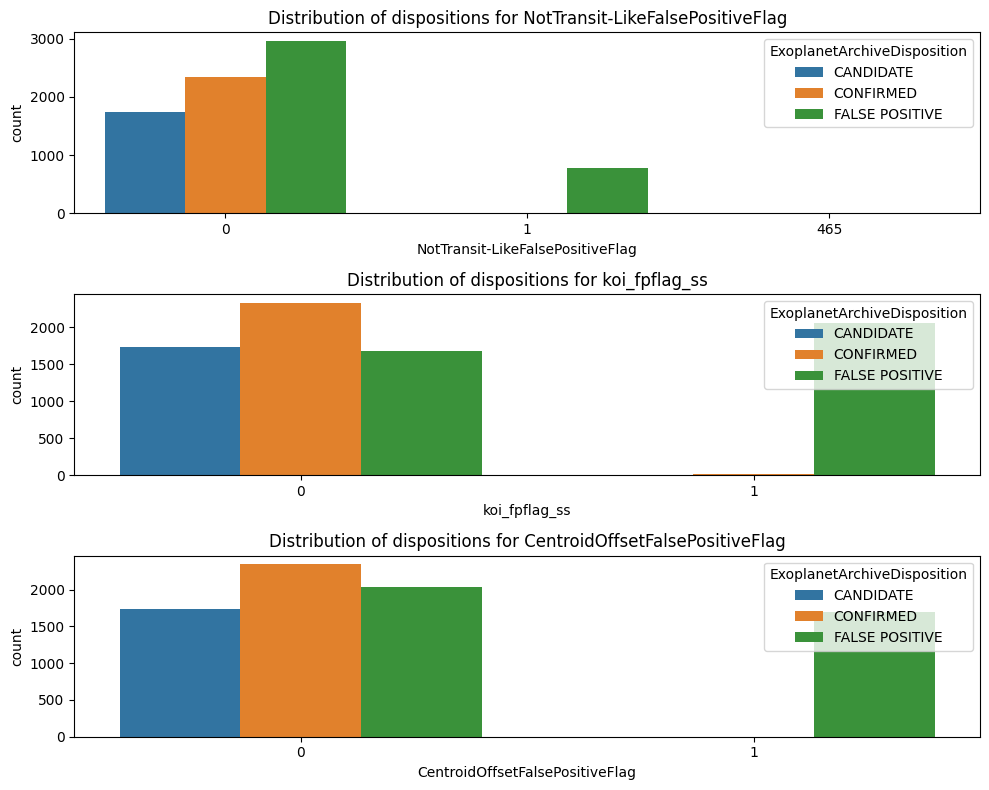

In [45]:
# Transit Flags y Disposición:

flags = ['NotTransit-LikeFalsePositiveFlag', 'koi_fpflag_ss', 'CentroidOffsetFalsePositiveFlag']
fig, axs = plt.subplots(len(flags), 1, figsize=(10, 8))
for i, flag in enumerate(flags):
    sns.countplot(x=flag, hue='ExoplanetArchiveDisposition', data=exop, ax=axs[i])
    axs[i].set_title(f'Distribution of dispositions for {flag}')

plt.tight_layout()
plt.show()


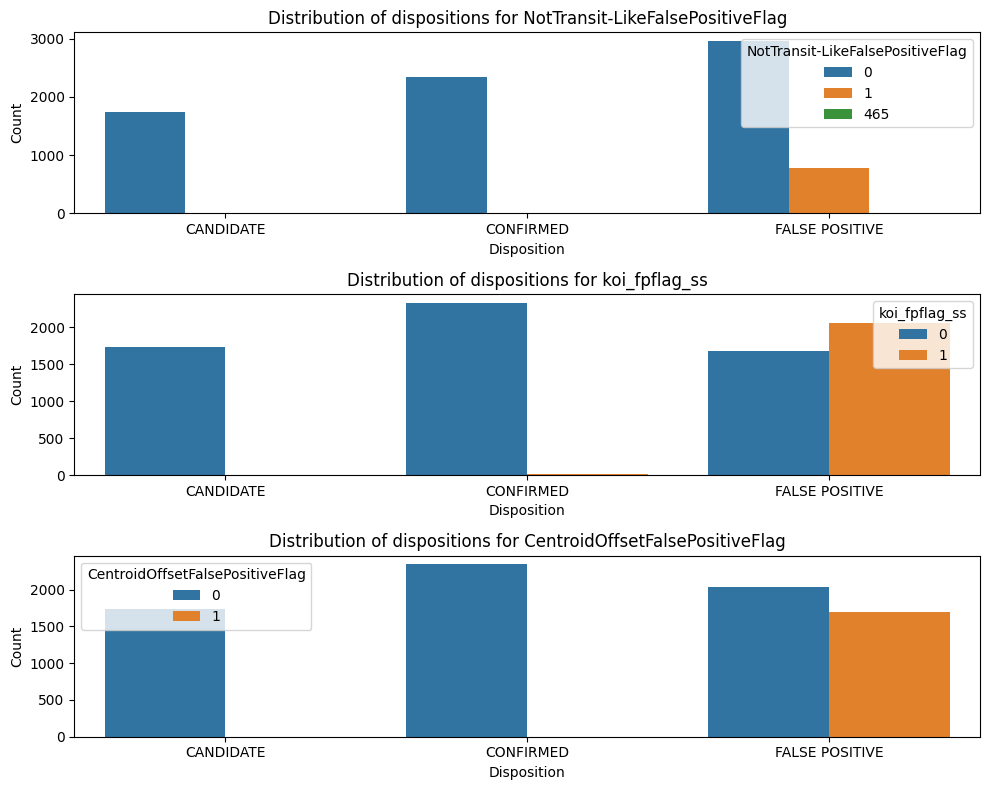

In [46]:
# Histograma Disposición - Distribución:

fig, axs = plt.subplots(len(flags), 1, figsize=(10, 8))
for i, flag in enumerate(flags):
    sns.countplot(data=exop, x='ExoplanetArchiveDisposition', hue=flag, ax=axs[i])
    axs[i].set_title(f'Distribution of dispositions for {flag}')
    axs[i].set_xlabel('Disposition')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

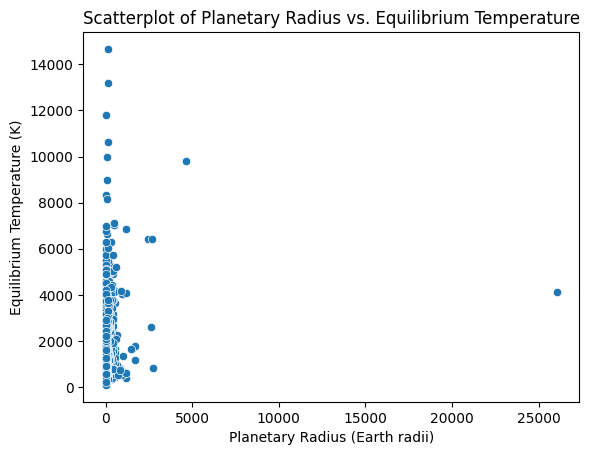

In [47]:
# Radio Planetario y Temperatura de Equilibrio:

sns.scatterplot(
    data=exop,
    x='PlanetaryRadius_Earthradii',
    y='EquilibriumTemperatureK'
)

plt.title('Scatterplot of Planetary Radius vs. Equilibrium Temperature')
plt.xlabel('Planetary Radius (Earth radii)')
plt.ylabel('Equilibrium Temperature (K)')

plt.show()

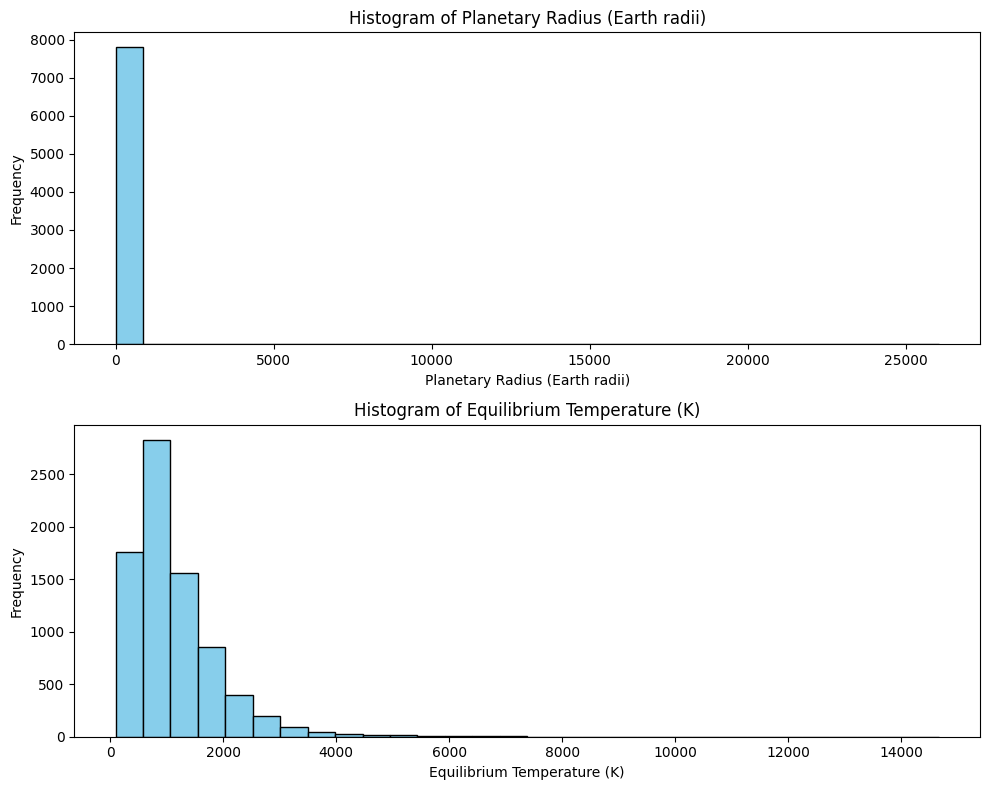

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].hist(exop['PlanetaryRadius_Earthradii'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Planetary Radius (Earth radii)')
axs[0].set_xlabel('Planetary Radius (Earth radii)')
axs[0].set_ylabel('Frequency')

# Creación de histograma para EquilibriumTemperatureK
axs[1].hist(exop['EquilibriumTemperatureK'], bins=30, color='skyblue', edgecolor='black')
axs[1].set_title('Histogram of Equilibrium Temperature (K)')
axs[1].set_xlabel('Equilibrium Temperature (K)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


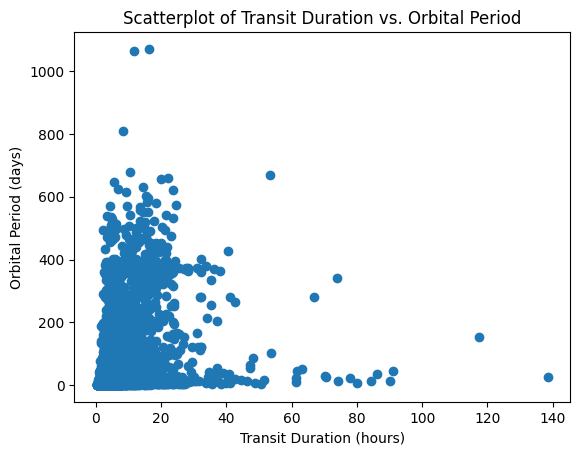

In [49]:
# Duración de Tránsito y Período Orbital:

plt.scatter(
    exop['TransitDuration_hrs'],
    exop['OrbitalPeriod_days']
)

plt.title('Scatterplot of Transit Duration vs. Orbital Period')
plt.xlabel('Transit Duration (hours)')
plt.ylabel('Orbital Period (days)')

plt.show()

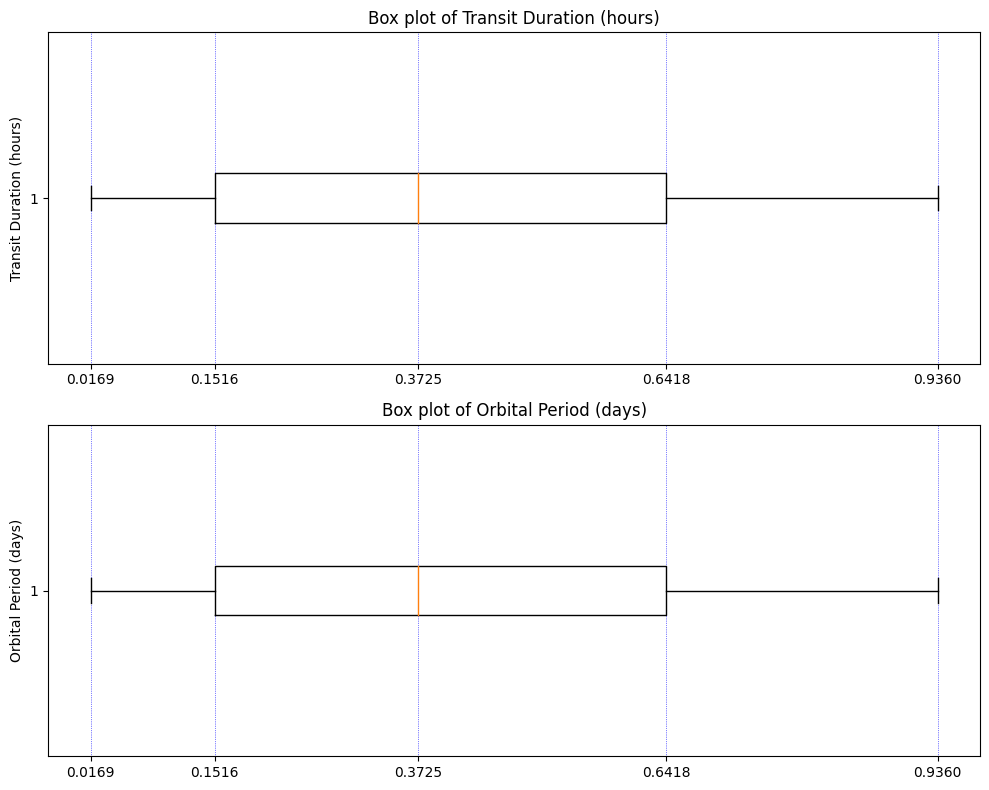

In [50]:
# A continuación un análisis de boxplot por medidas medias en cuartiles para detectar outliers:
vel_arr = np.random.rand(50, 1)
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].boxplot(vel_arr, vert=False, manage_ticks=True)
axs[0].set_title('Box plot of Transit Duration (hours)')
axs[0].set_ylabel('Transit Duration (hours)')

axs[1].boxplot(vel_arr, vert=False, manage_ticks=True)
axs[1].set_title('Box plot of Orbital Period (days)')
axs[1].set_ylabel('Orbital Period (days)')

quantiles = np.quantile(vel_arr, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
for q in quantiles:
    axs[0].vlines(q, 0.5, 1.5, color='b', ls=':', lw=0.5, zorder=0)
    axs[1].vlines(q, 0.5, 1.5, color='b', ls=':', lw=0.5, zorder=0)

axs[0].set_xticks(quantiles)
axs[1].set_xticks(quantiles)

plt.tight_layout()
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [52]:
#variable independiente
X = exop[['DispositionUsingKeplerData','NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag','EquilibriumTemperatureK','InsolationFlux_Earthflux','PlanetaryRadius_Earthradii']]

#variable a predecir
y = exop[['ExoplanetArchiveDisposition']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

In [54]:
X_train.dtypes

DispositionUsingKeplerData          category
NotTransit-LikeFalsePositiveFlag    category
koi_fpflag_ss                       category
CentroidOffsetFalsePositiveFlag     category
EquilibriumTemperatureK              float64
InsolationFlux_Earthflux             float64
PlanetaryRadius_Earthradii           float64
dtype: object

In [55]:
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object on the categorical variables in X_train
X_train = X_train.apply(le.fit_transform)

# Fit the DecisionTreeClassifier on the transformed X_train and y_train data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object on the categorical variables in X_test
X_test = X_test.apply(le.fit_transform)
y_pred = clf.predict(X_test)

In [57]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el informe de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7608695652173914
Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.46      0.47      0.47       510
     CONFIRMED       0.59      0.58      0.58       680
FALSE POSITIVE       1.00      0.99      1.00      1156

      accuracy                           0.76      2346
     macro avg       0.68      0.68      0.68      2346
  weighted avg       0.76      0.76      0.76      2346



In [58]:
 from sklearn.metrics import confusion_matrix

In [59]:
preds = clf.predict(X_test)
preds_train = clf.predict(X_train)
cm = confusion_matrix(y_test, preds)

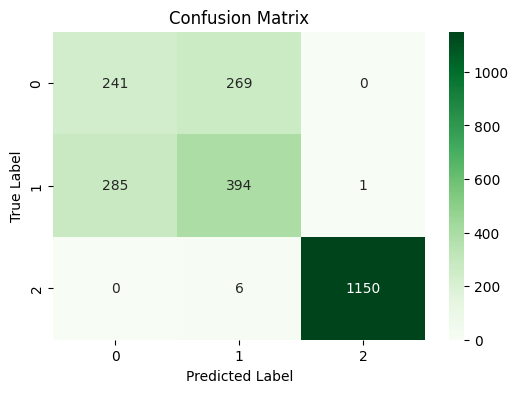

In [76]:
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [62]:
y.value_counts()

ExoplanetArchiveDisposition
FALSE POSITIVE                 3737
CONFIRMED                      2345
CANDIDATE                      1736
Name: count, dtype: int64

In [63]:
#los datos en las clases son incongruentes, no podemos hacer prueba de accuracy
y.value_counts(normalize=True).round(2)*100

ExoplanetArchiveDisposition
FALSE POSITIVE                 48.0
CONFIRMED                      30.0
CANDIDATE                      22.0
Name: proportion, dtype: float64

In [79]:
# Check for non-numeric values in each column
for column in exop.columns:
    non_numeric_values = exop[column].apply(lambda x: not pd.to_numeric(x, errors='ignore'))
    if non_numeric_values.any():
        print(f"Non-numeric values found in column: {column}")

Non-numeric values found in column: DispositionScore
Non-numeric values found in column: NotTransit-LikeFalsePositiveFlag


TypeError: 'Categorical' with dtype category does not support reduction 'any'

In [68]:
from sklearn.metrics import f1_score

In [70]:
f1 = f1_score(y_test, y_pred, average='micro')

print("F1-score:", f1)

F1-score: 0.7608695652173914


In [71]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

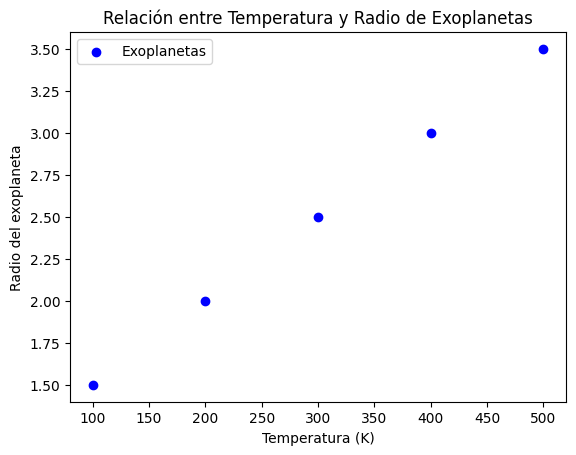

In [27]:
# Datos de ejemplo (reemplaza con tus datos reales)
temperaturas = [100, 200, 300, 400, 500]  # Temperaturas en Kelvin
radios = [1.5, 2.0, 2.5, 3.0, 3.5]  # Radios en unidades arbitrarias

# Crear un gráfico de dispersión
plt.scatter(temperaturas, radios, color='b', marker='o', label='Exoplanetas')

# Etiquetas y título
plt.xlabel('Temperatura (K)')
plt.ylabel('Radio del exoplaneta')
plt.title('Relación entre Temperatura y Radio de Exoplanetas')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

ValueError: could not convert string to float: 'K00752.01'

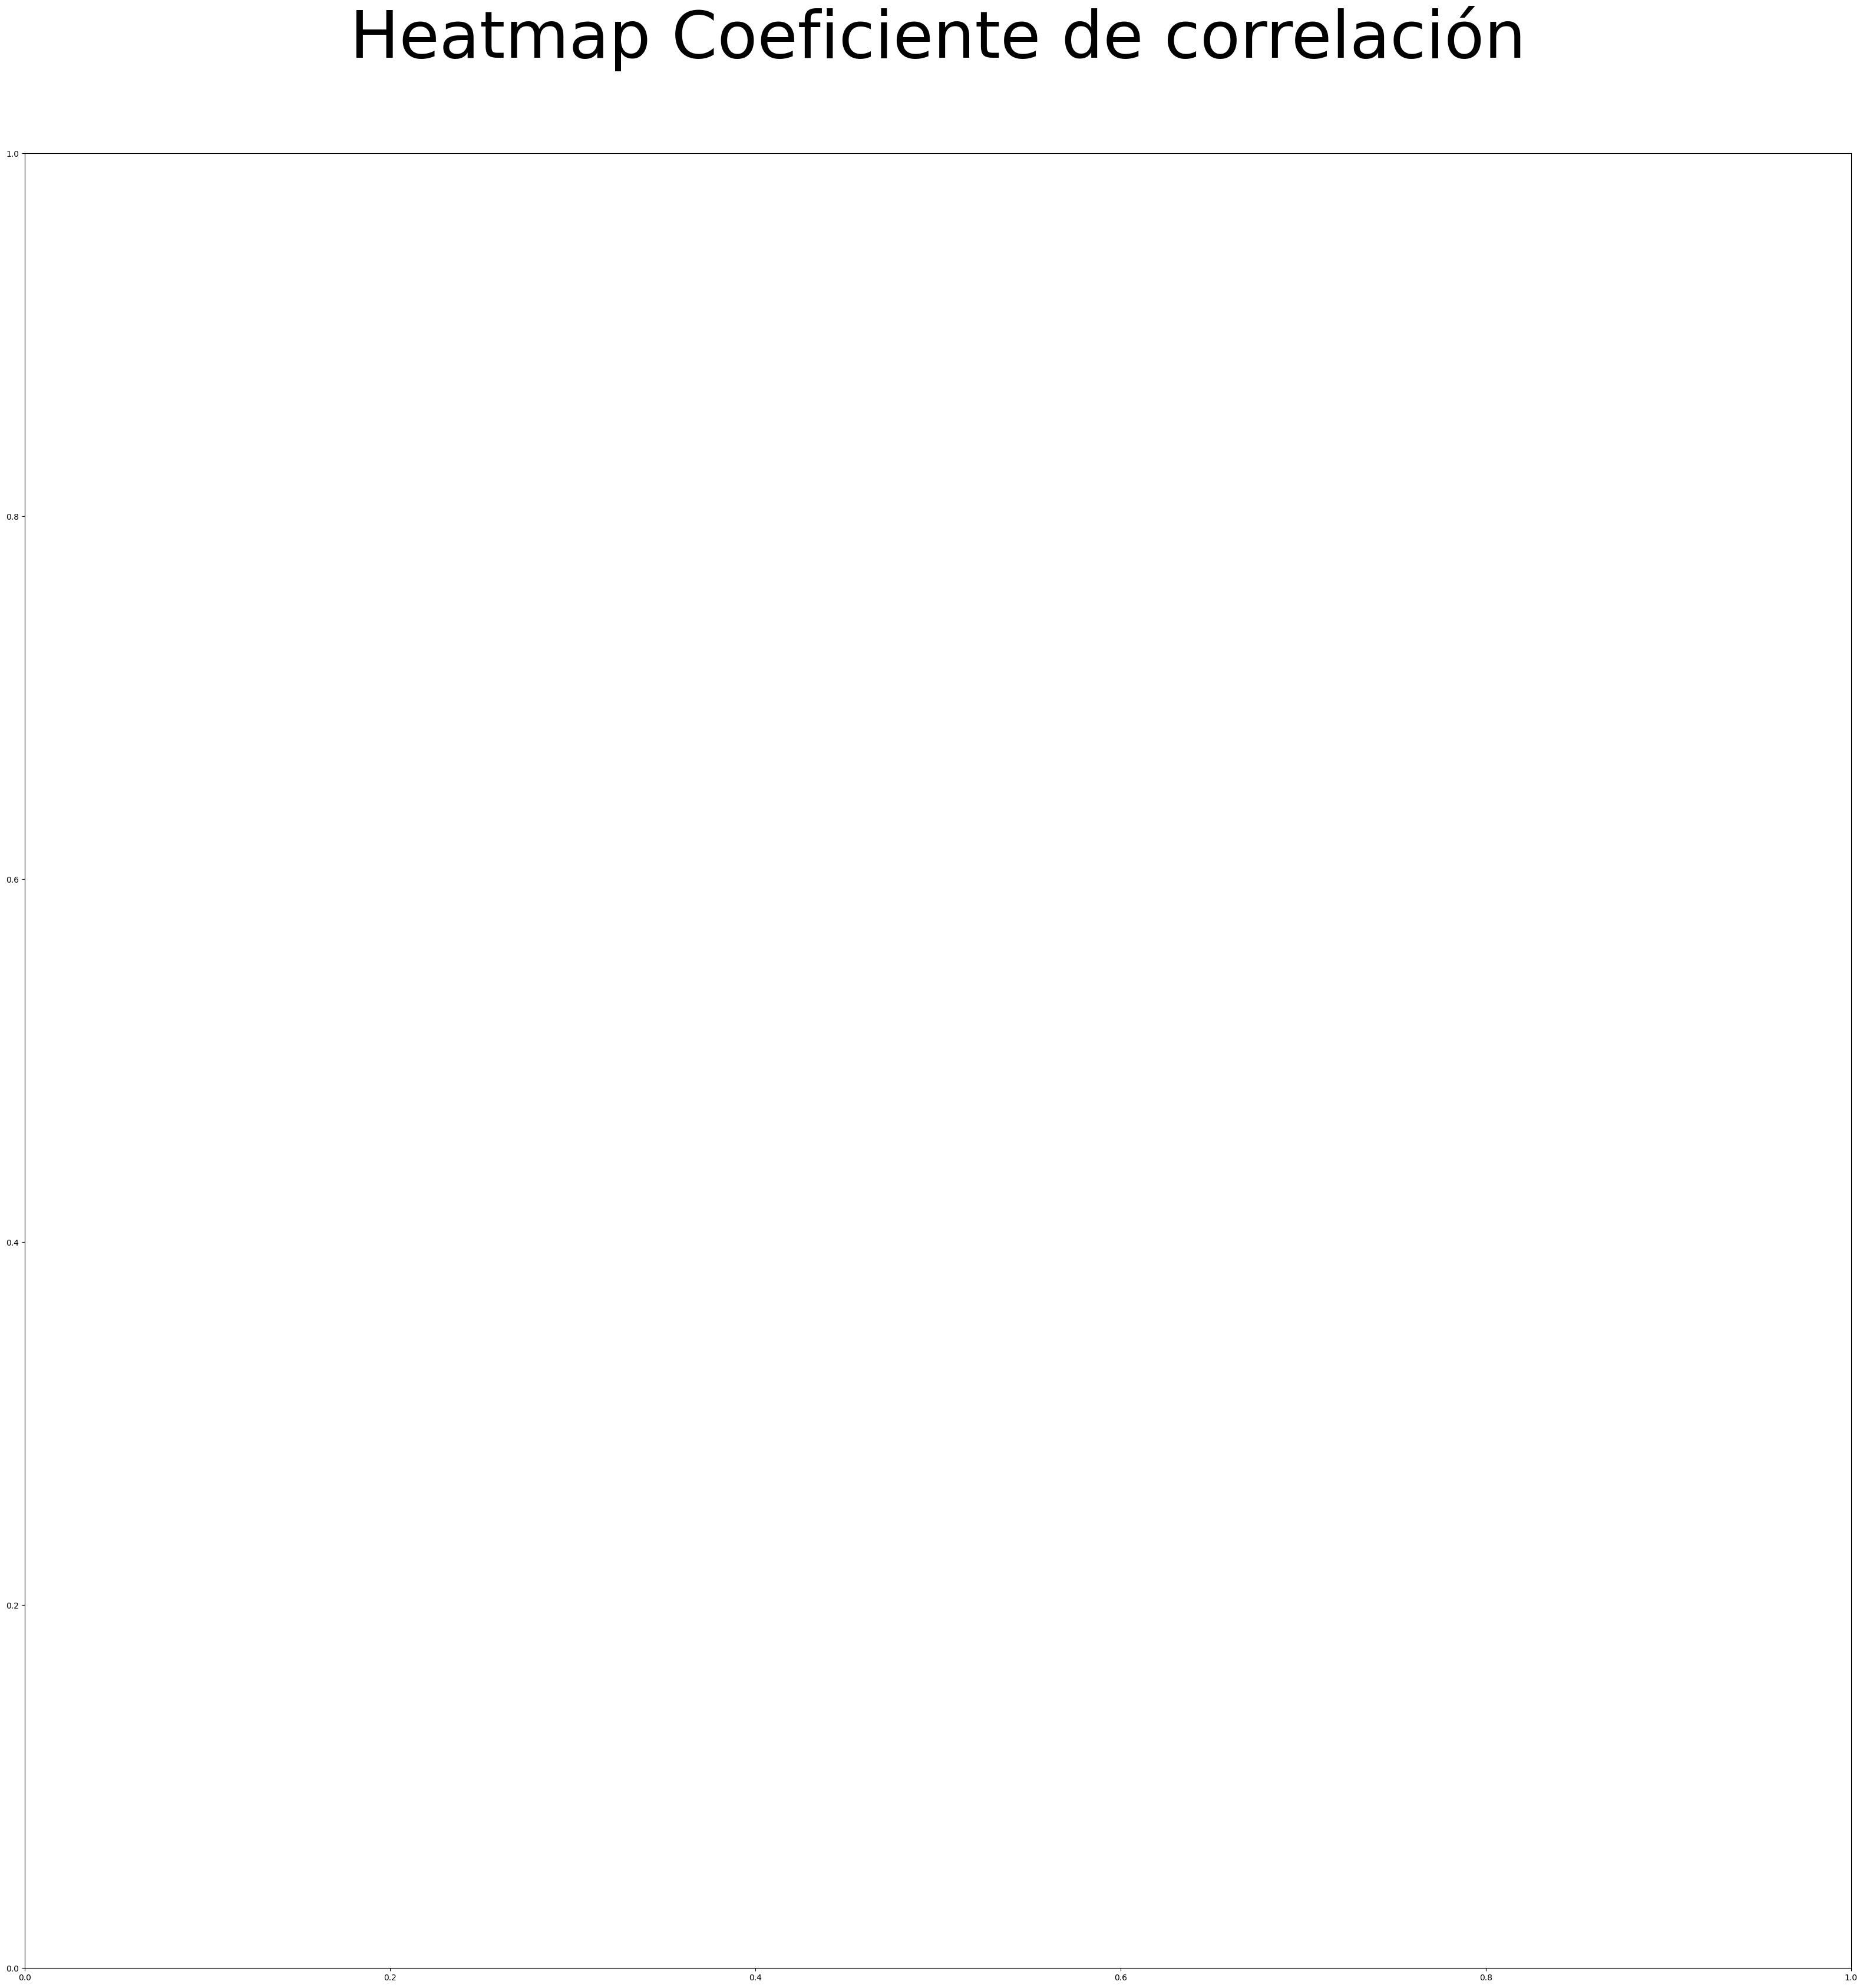

In [78]:
mapacoef = plt.cm.viridis
plt.figure(figsize=(40,40))
plt.title('Heatmap Coeficiente de correlación', y=1.05, size=80)
sns.heatmap(exop.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=mapacoef, linecolor='white', annot=True)

plt.show()